In [1]:
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras import backend as K
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from patchify import patchify, unpatchify
from tensorflow.keras import backend as K
import pandas as pd
def f1(y_true, y_pred, threshold=0.3):
    y_pred = tf.cast(y_pred > threshold, tf.float32)
    TP = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    Positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    Pred_Positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = TP / (Pred_Positives + tf.keras.backend.epsilon())
    recall = TP / (Positives + tf.keras.backend.epsilon())
    return 2 * ((precision * recall) / (precision + recall + tf.keras.backend.epsilon()))
    
@tf.keras.utils.register_keras_serializable()
def f1_metric(y_true, y_pred):
    return f1(y_true, y_pred, threshold=0.3)


def weighted_binary_crossentropy(y_true, y_pred):
    """
    Weighted binary cross-entropy to address class imbalance.
    """
    # Define weights for foreground (root, shoot, seed) and background
    weight_foreground = 10.0
    weight_background = 1.0

    # Compute weighted binary cross-entropy
    y_true = K.flatten(y_true)
    y_pred = K.flatten(y_pred)
    weights = tf.where(y_true == 1, weight_foreground, weight_background)
    loss = K.binary_crossentropy(y_true, y_pred)
    weighted_loss = loss * weights
    return K.mean(weighted_loss)
def dice_loss(y_true, y_pred):
    intersection = tf.reduce_sum(y_true * y_pred)
    union = tf.reduce_sum(y_true) + tf.reduce_sum(y_pred)
    dice = (2. * intersection + 1e-7) / (union + 1e-7)
    return 1 - dice

@tf.keras.utils.register_keras_serializable()
def combined_loss(y_true, y_pred):
    return 0.5 * dice_loss(y_true, y_pred) + 0.5 * weighted_binary_crossentropy(y_true, y_pred)





2025-01-12 16:29:13,698 - INFO - Processing image: test_image_1.png


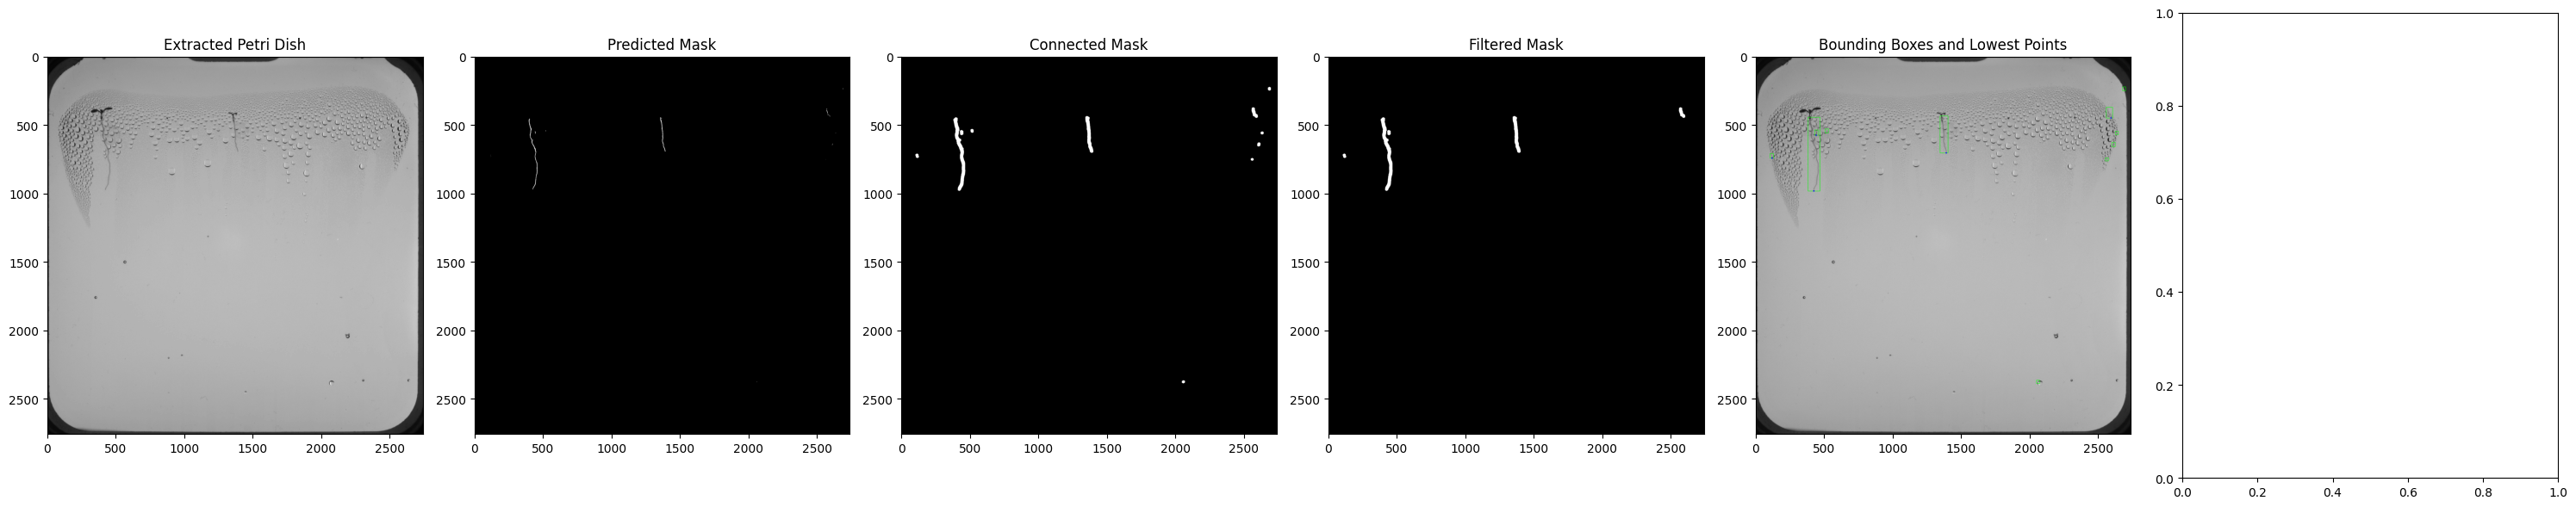

2025-01-12 16:29:23,309 - INFO - Processing image: test_image_10.png


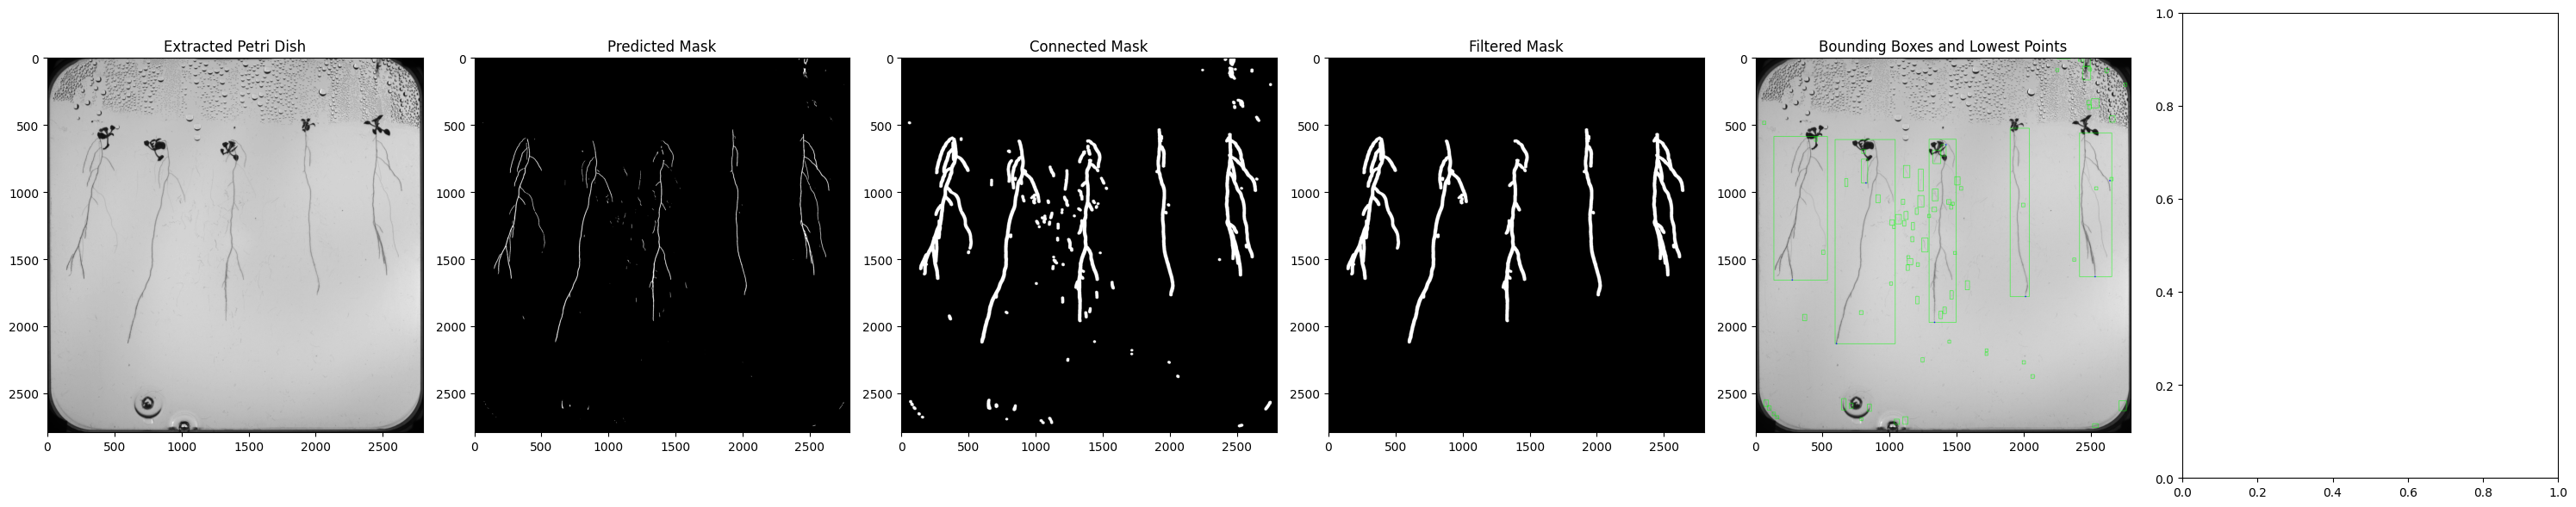

2025-01-12 16:29:28,635 - INFO - Processing image: test_image_11.png


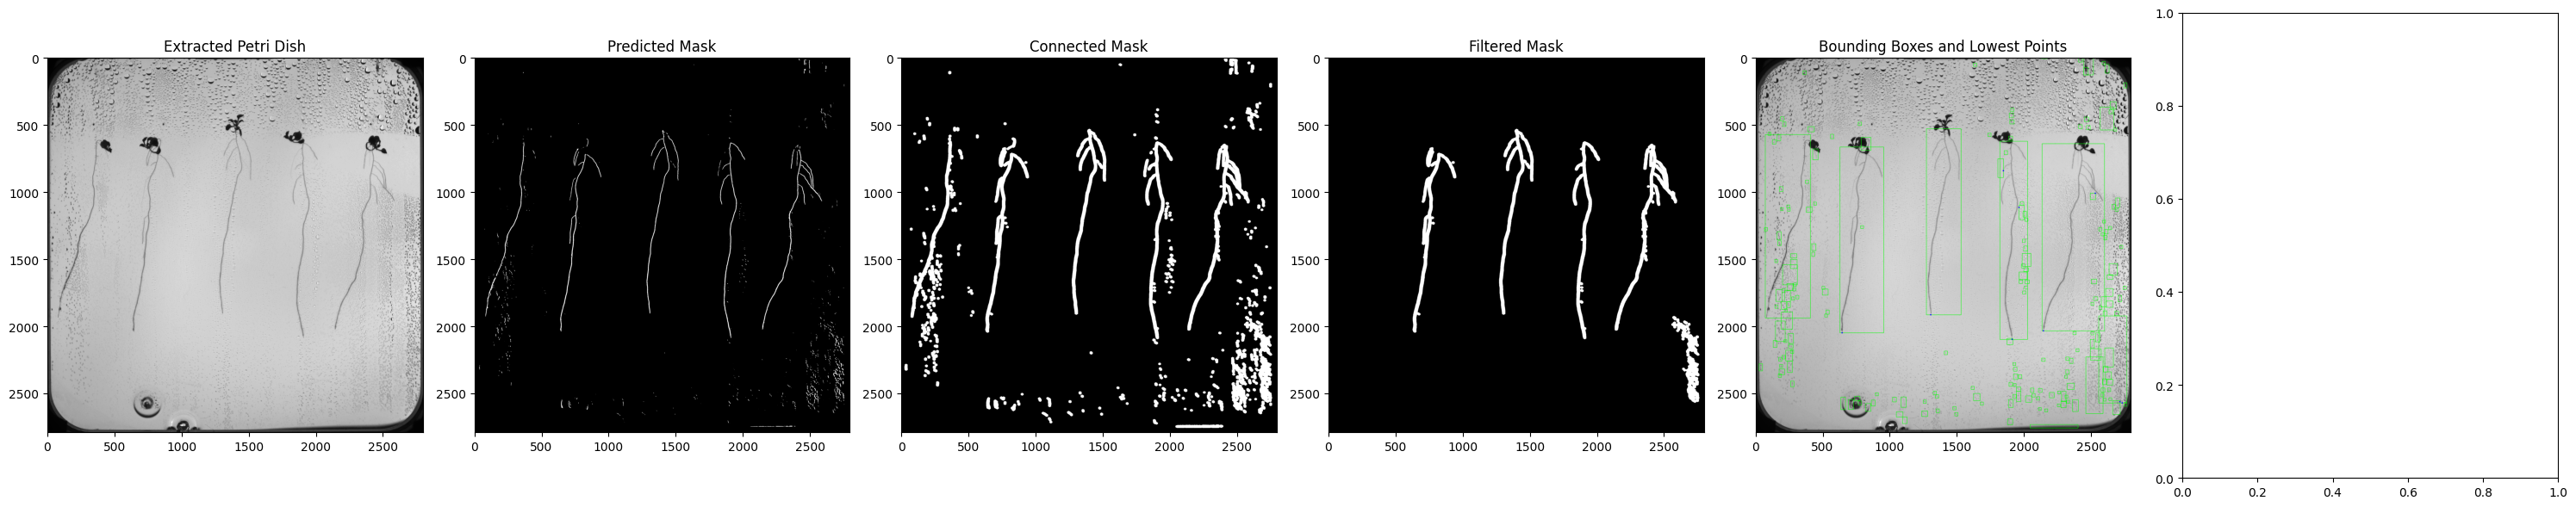

2025-01-12 16:29:34,646 - INFO - Processing image: test_image_12.png


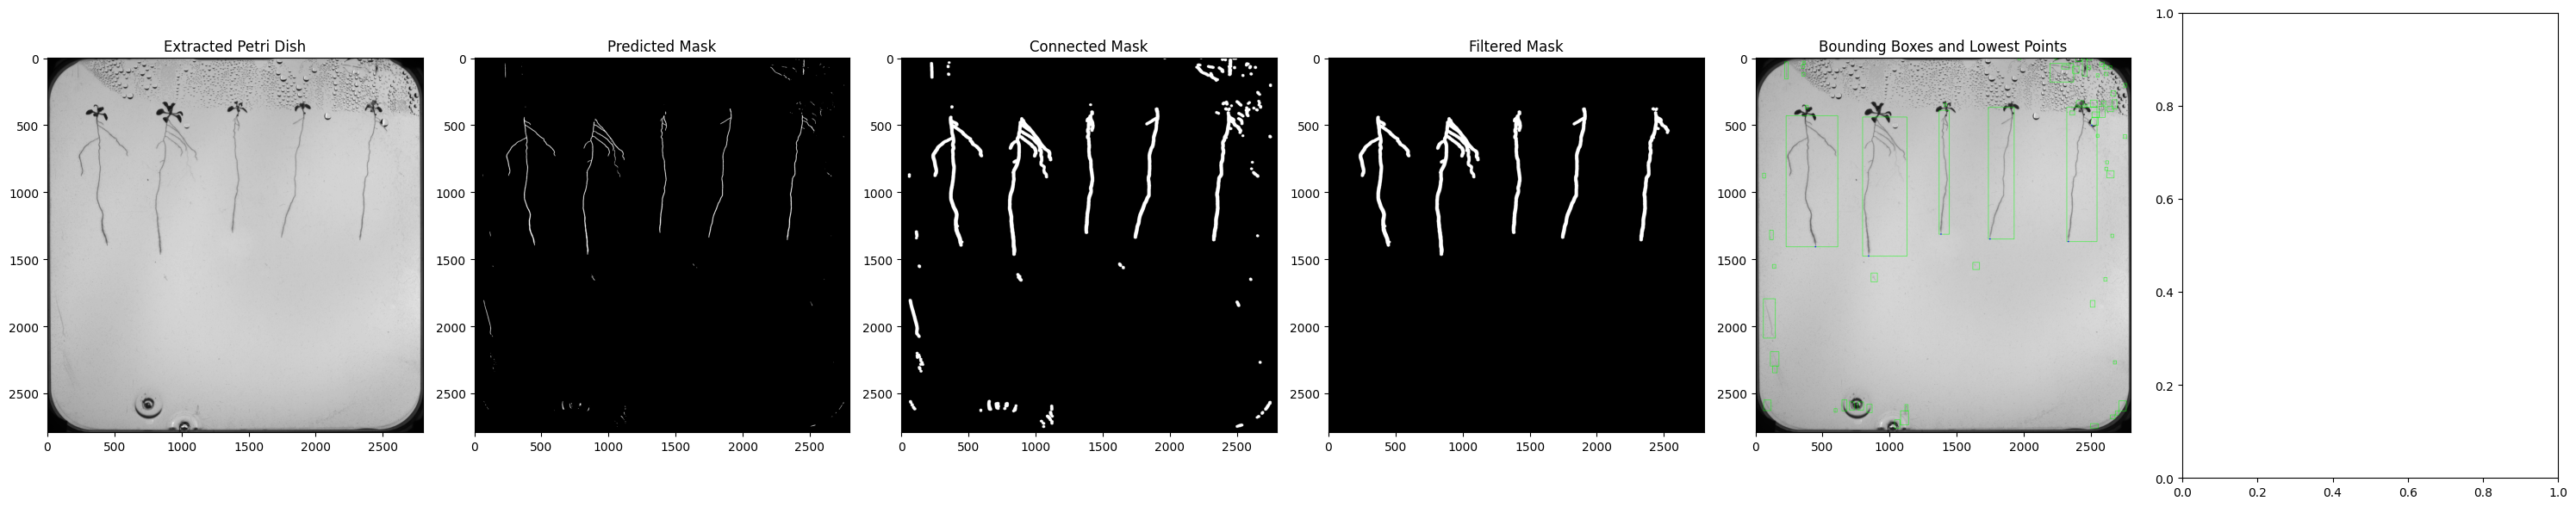

2025-01-12 16:29:39,714 - INFO - Processing image: test_image_13.png


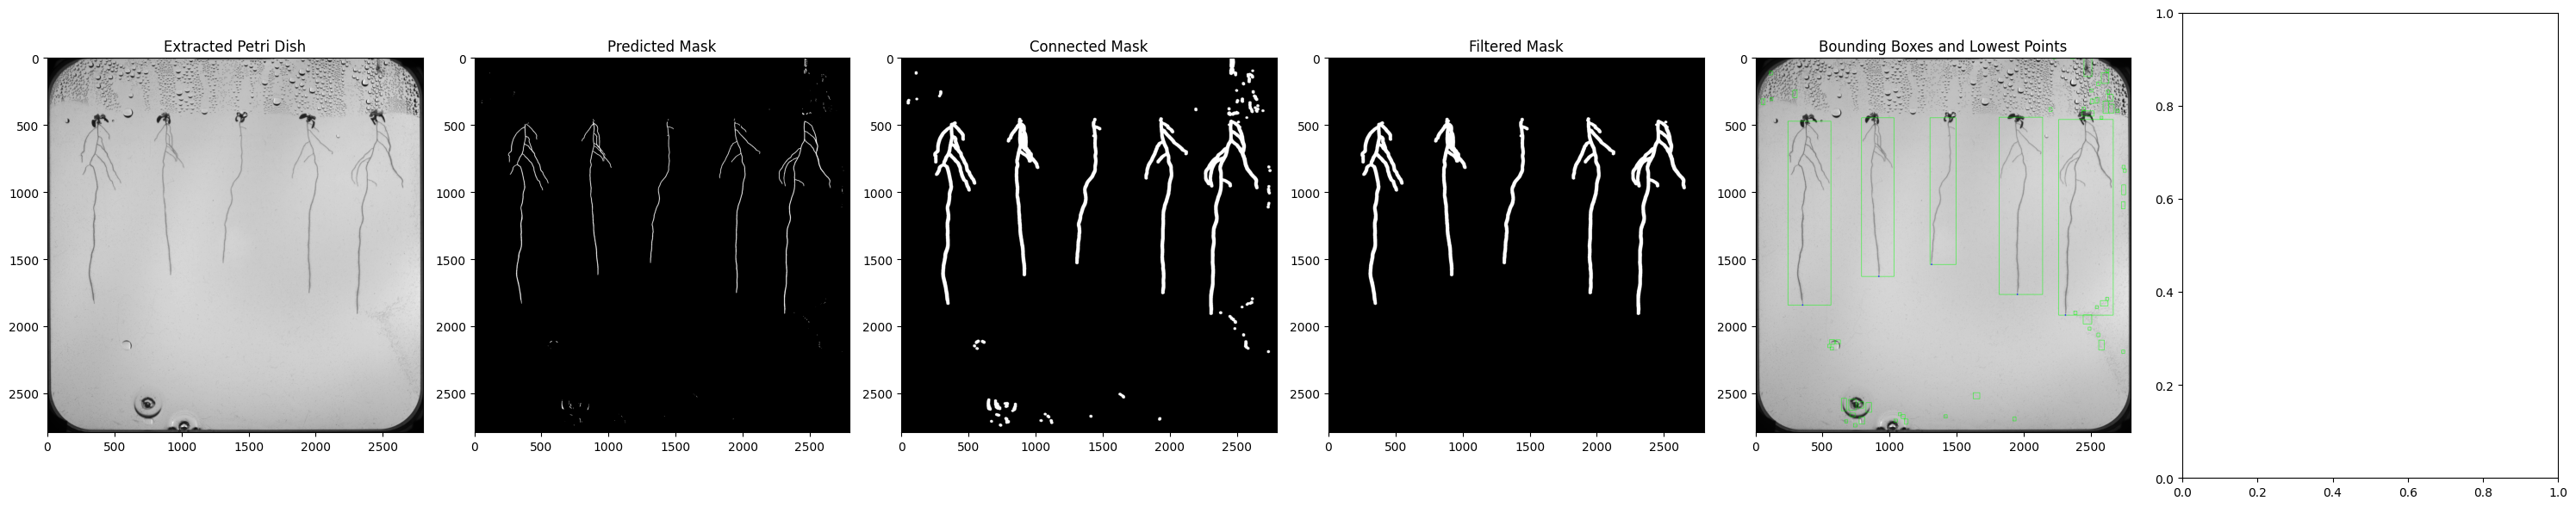

2025-01-12 16:29:44,543 - INFO - Processing image: test_image_14.png


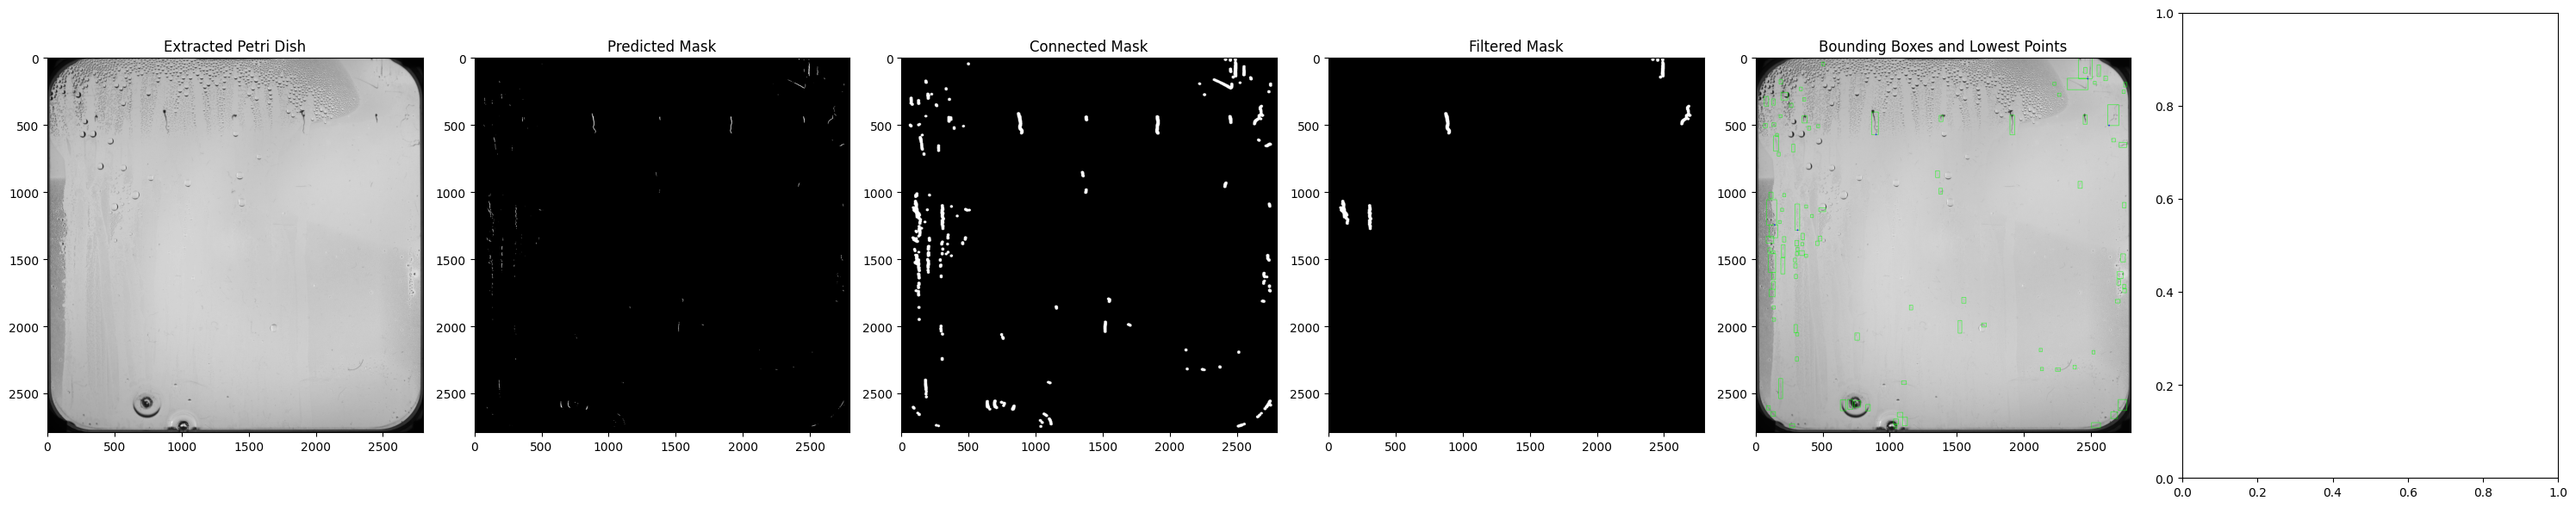

2025-01-12 16:29:50,329 - INFO - Processing image: test_image_15.png


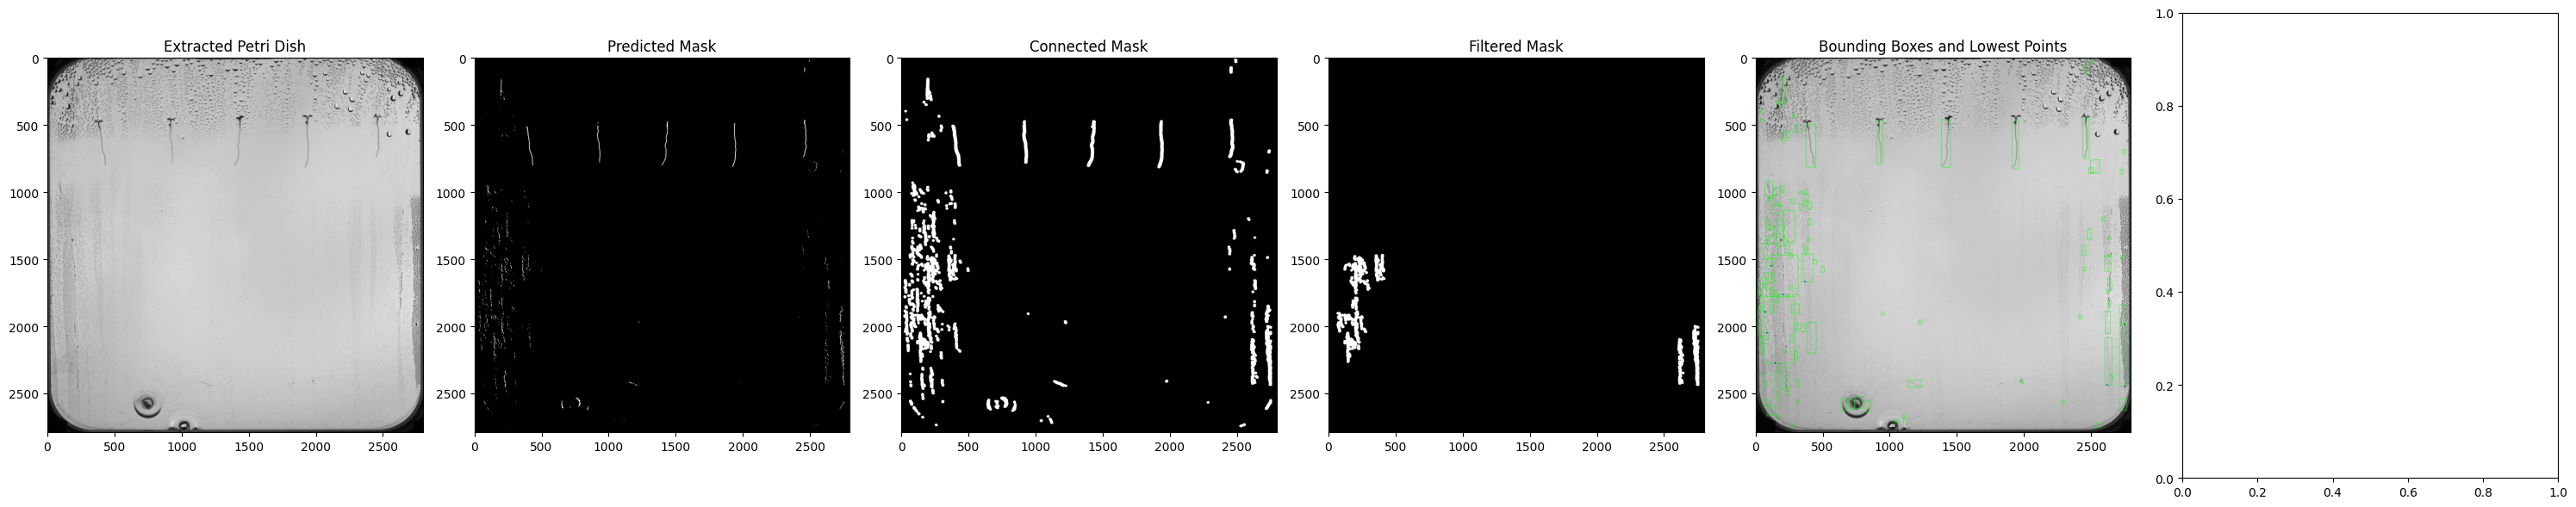

2025-01-12 16:29:55,753 - INFO - Processing image: test_image_16.png


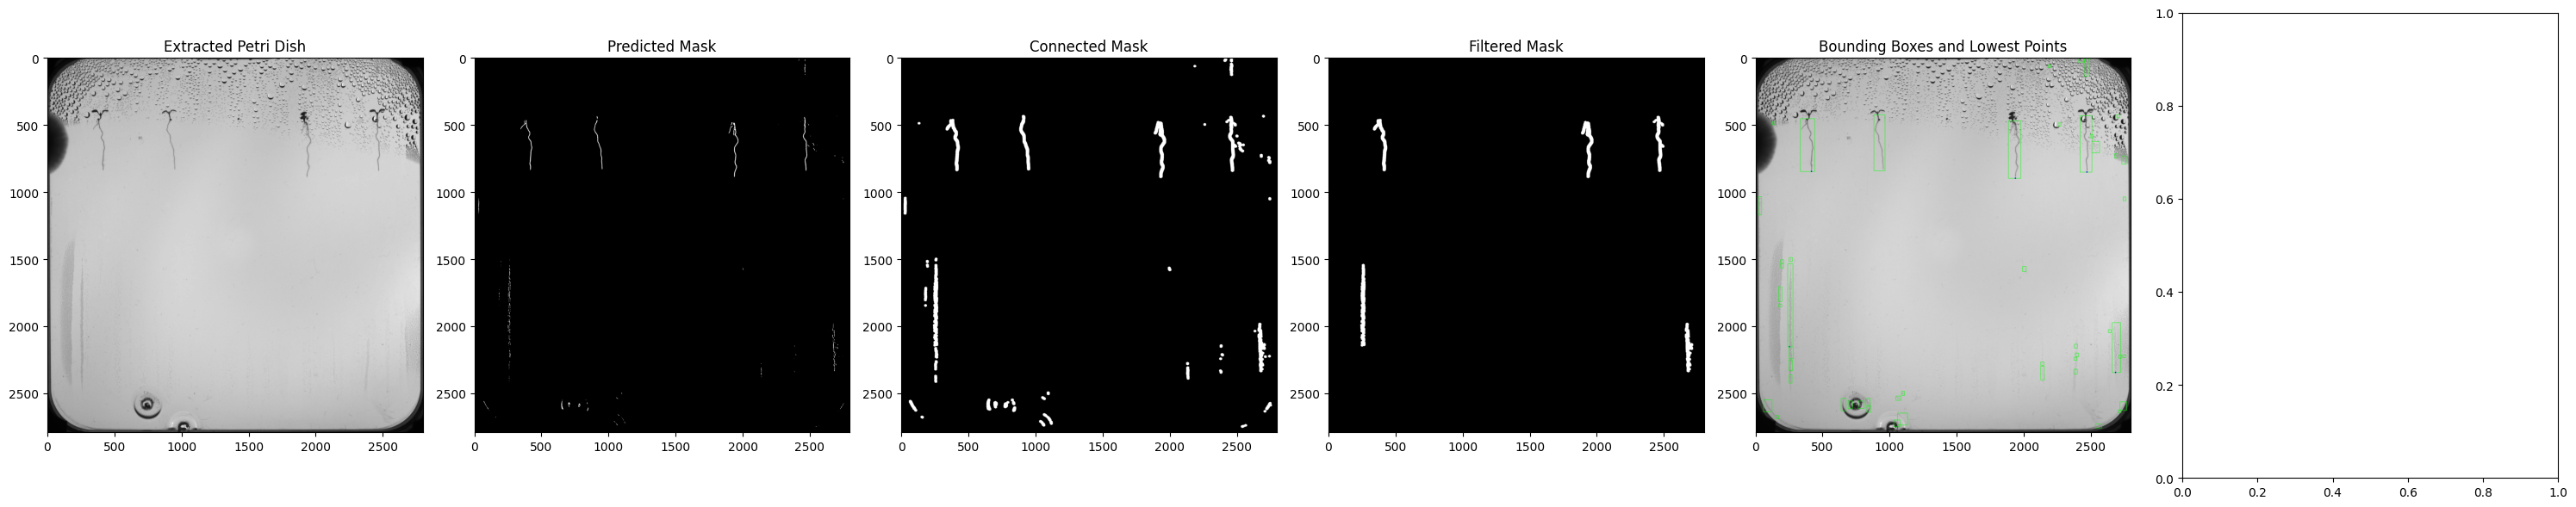

2025-01-12 16:30:00,441 - INFO - Processing image: test_image_17.png


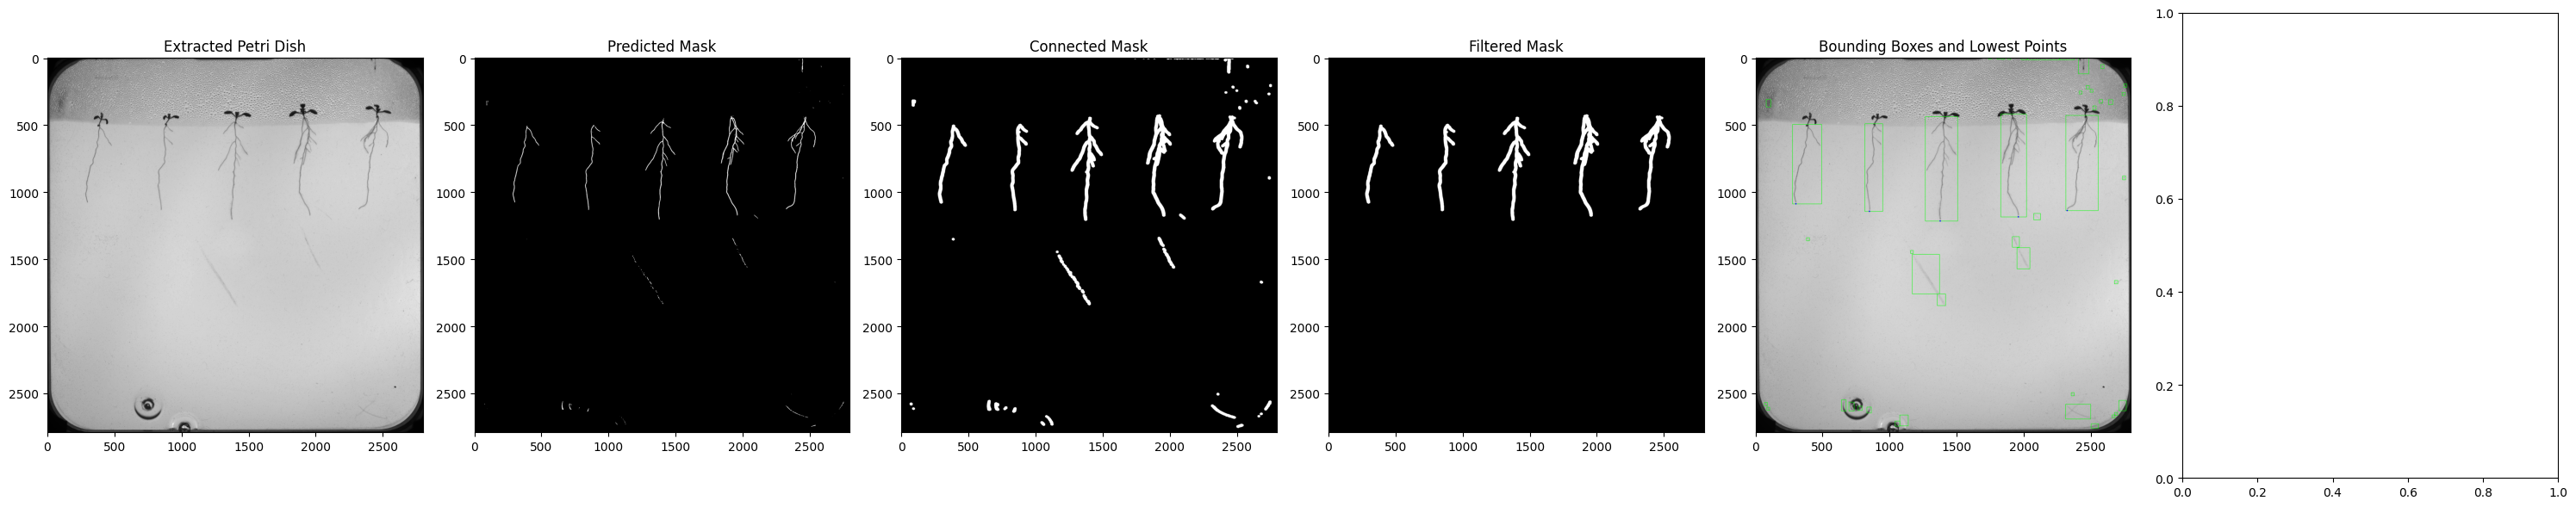

2025-01-12 16:30:05,096 - INFO - Processing image: test_image_18.png


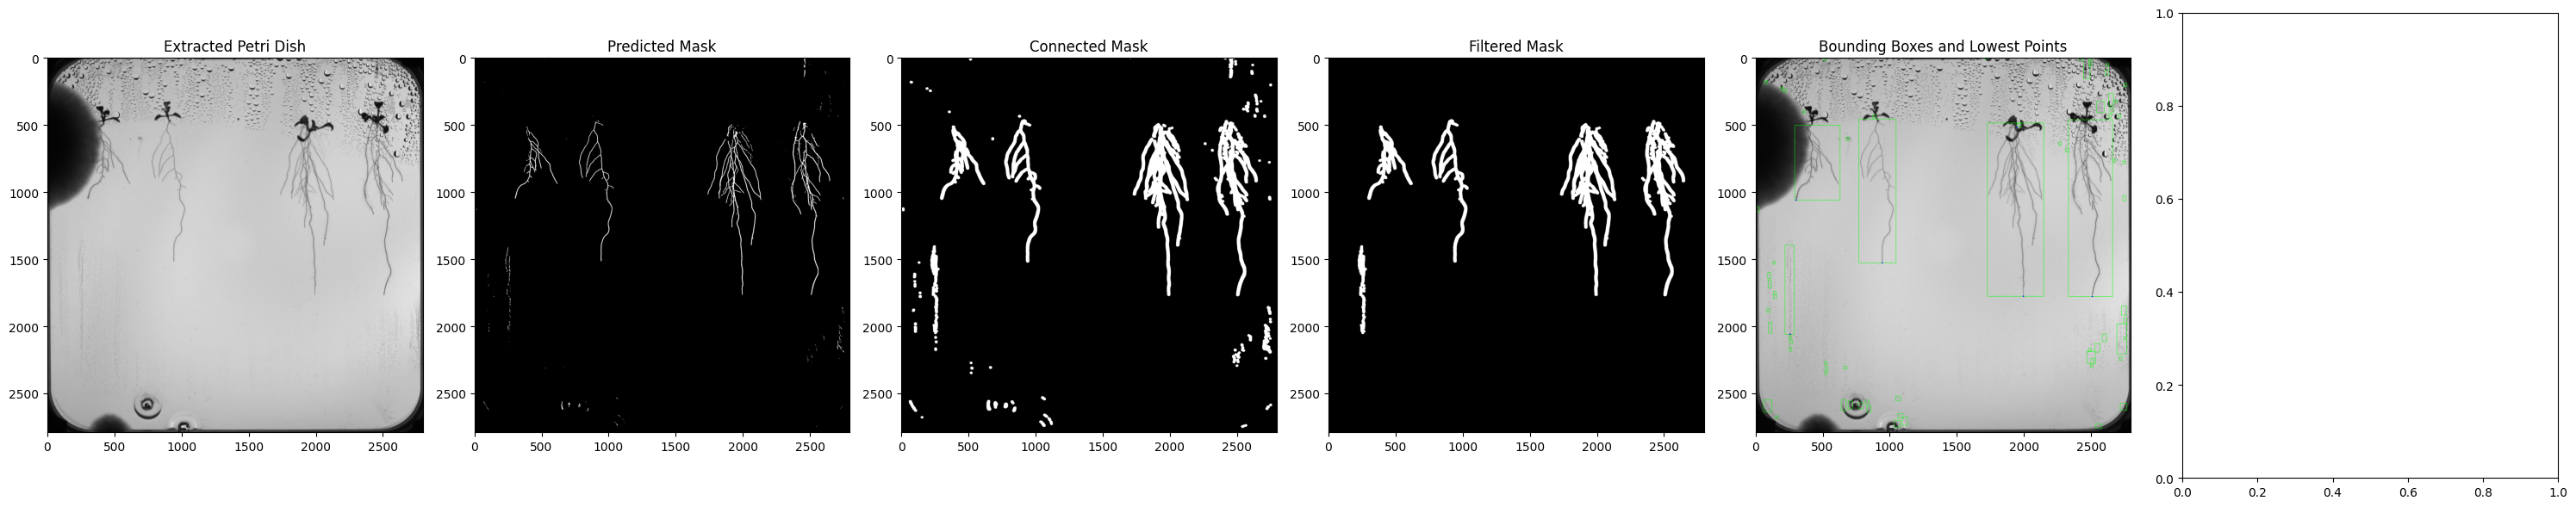

2025-01-12 16:30:10,086 - INFO - Processing image: test_image_2.png


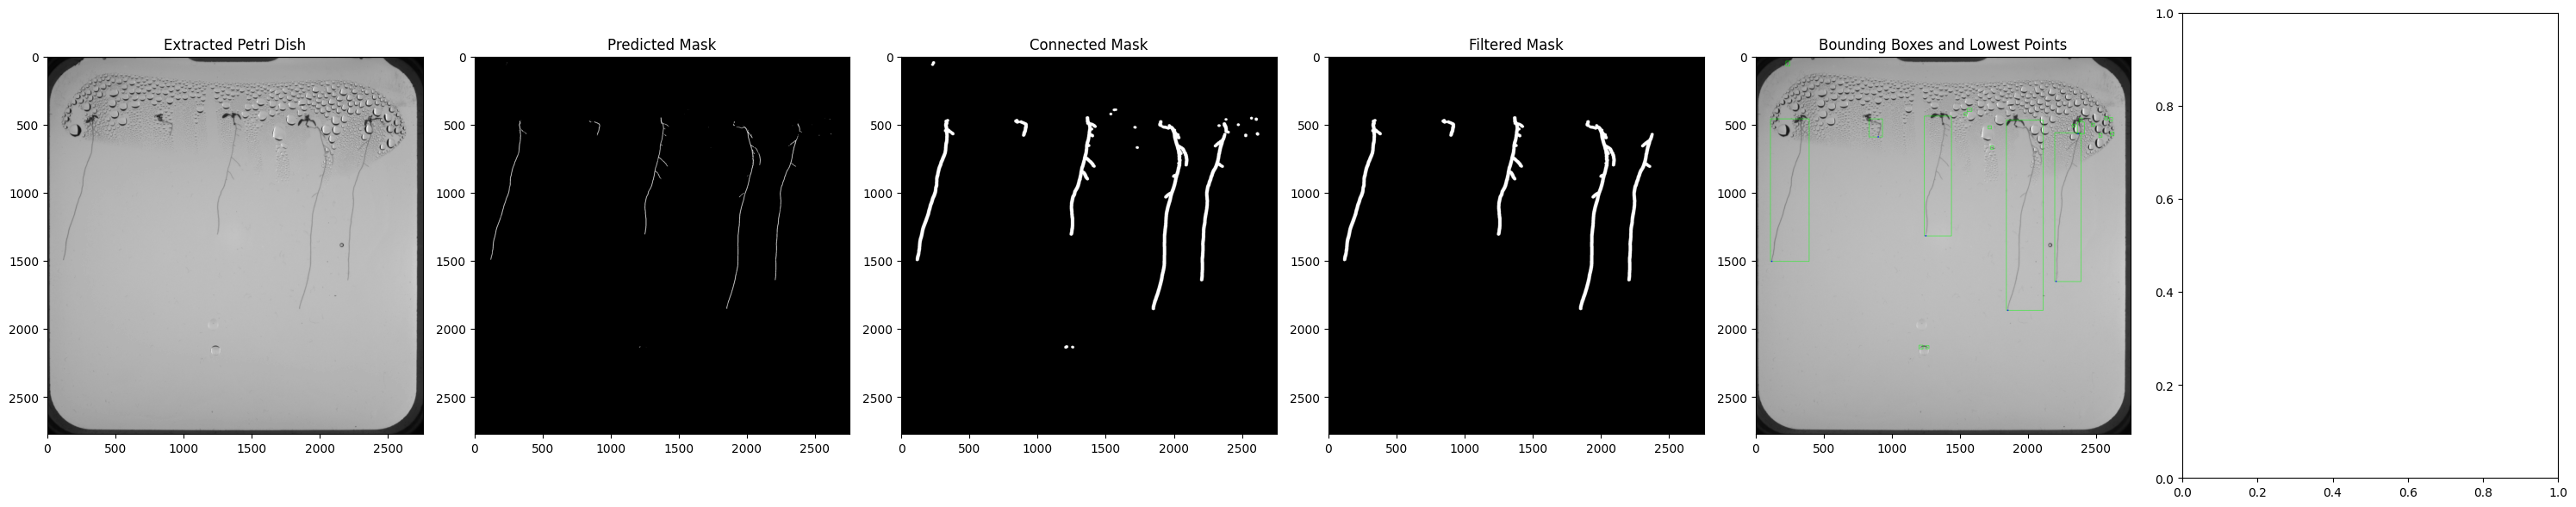

2025-01-12 16:30:14,823 - INFO - Processing image: test_image_3.png


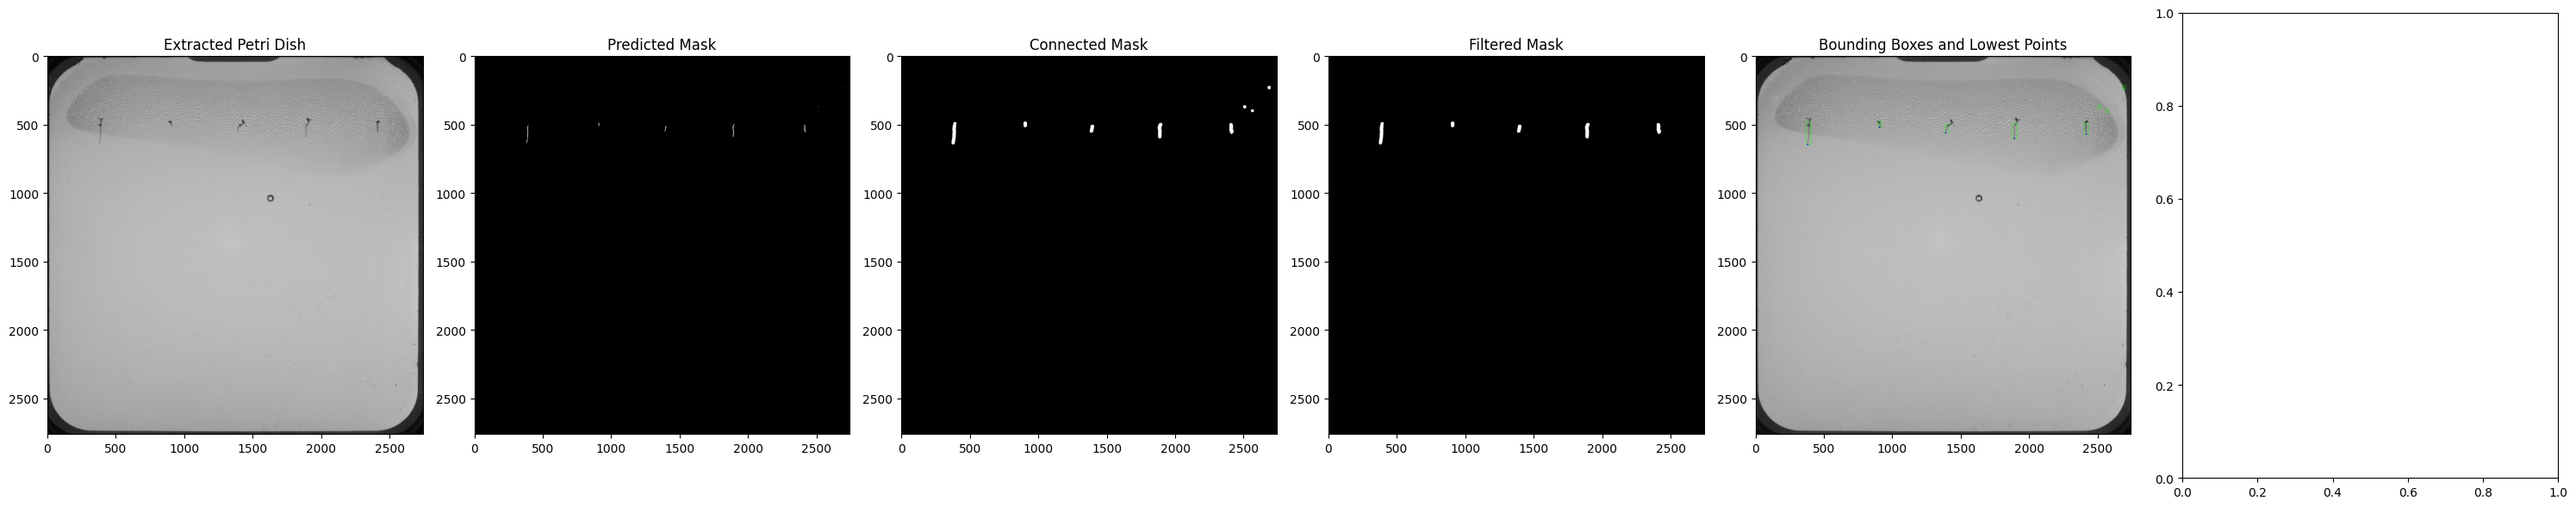

2025-01-12 16:30:19,041 - INFO - Processing image: test_image_4.png


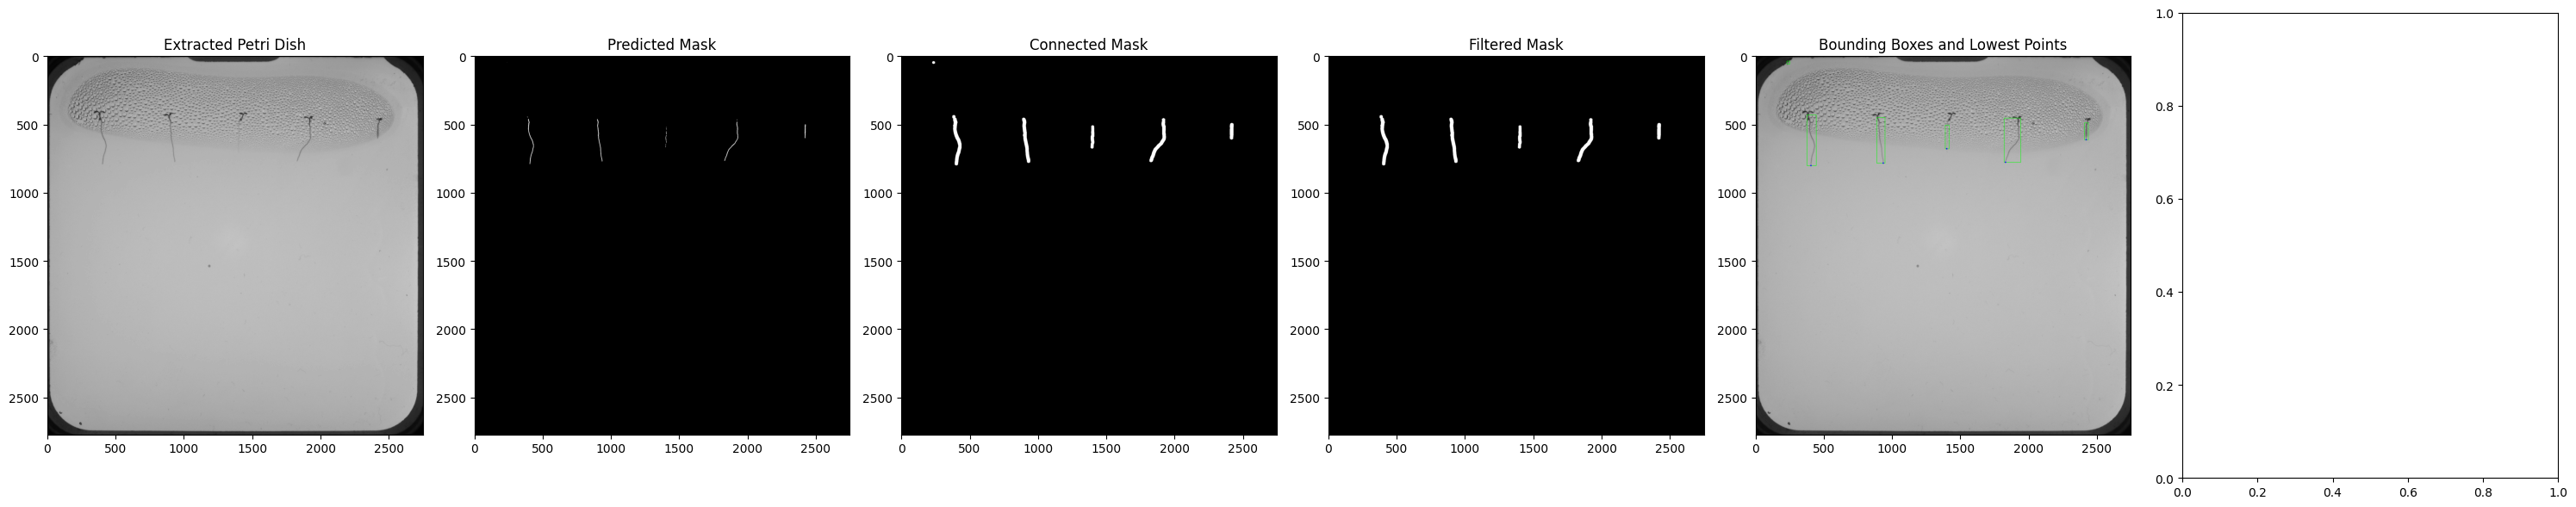

2025-01-12 16:30:23,326 - INFO - Processing image: test_image_5.png


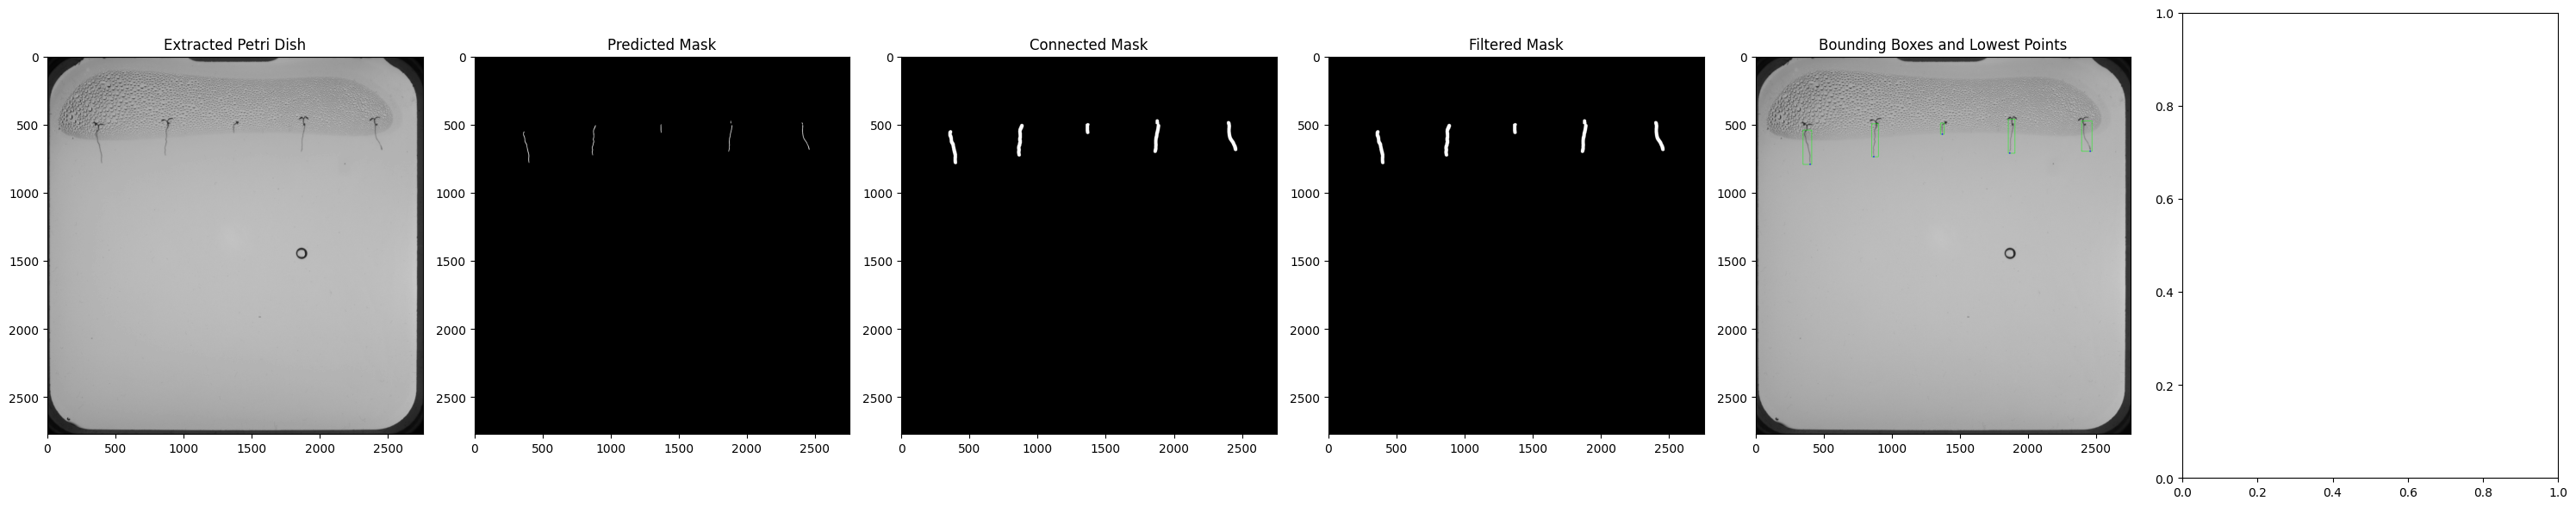

2025-01-12 16:30:27,615 - INFO - Processing image: test_image_6.png


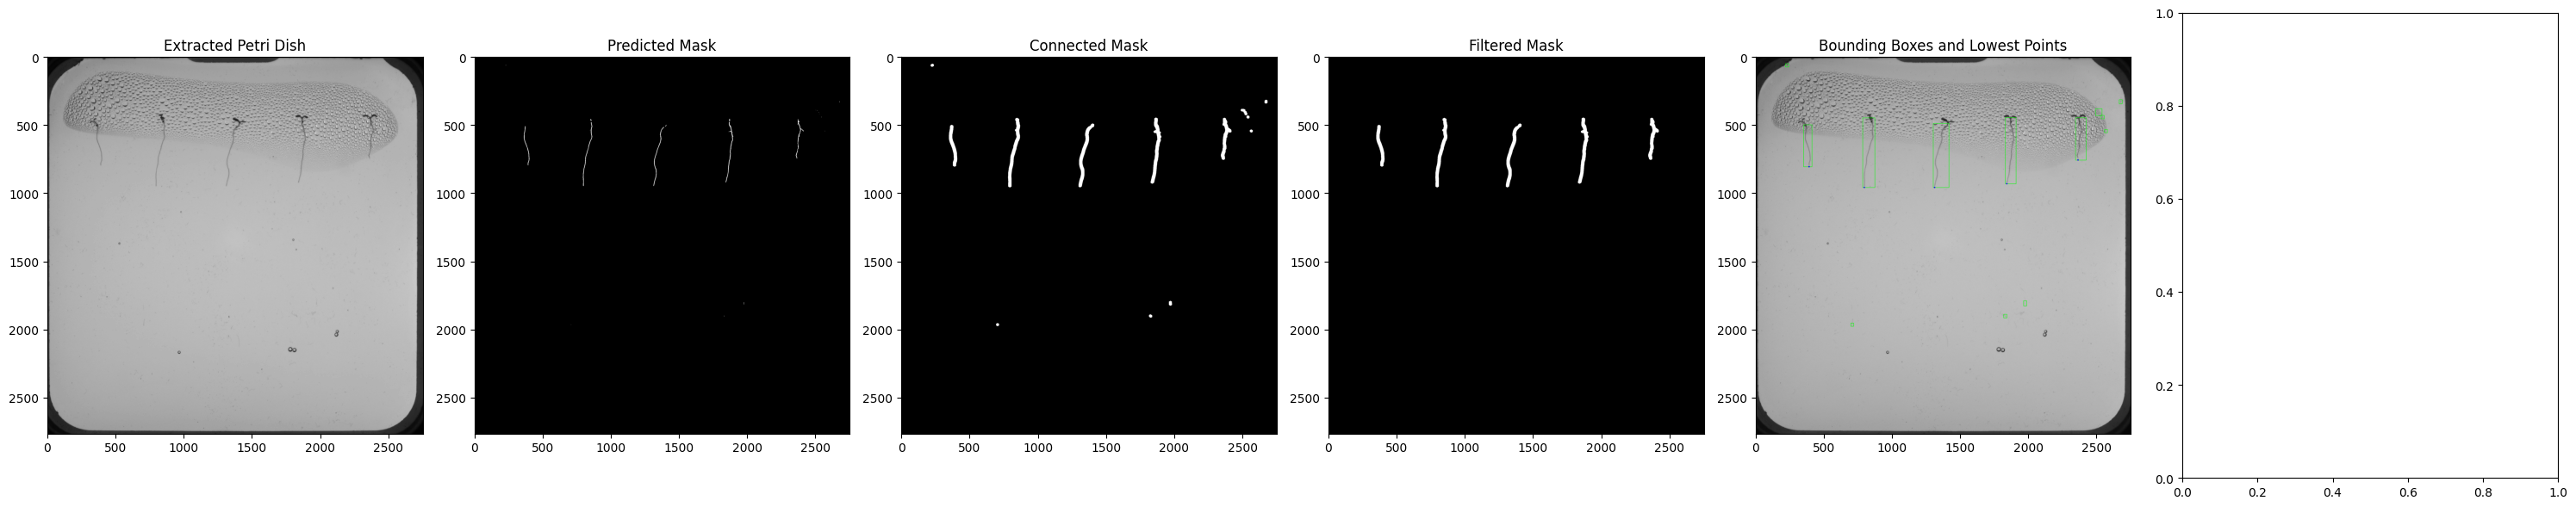

2025-01-12 16:30:31,817 - INFO - Processing image: test_image_7.png


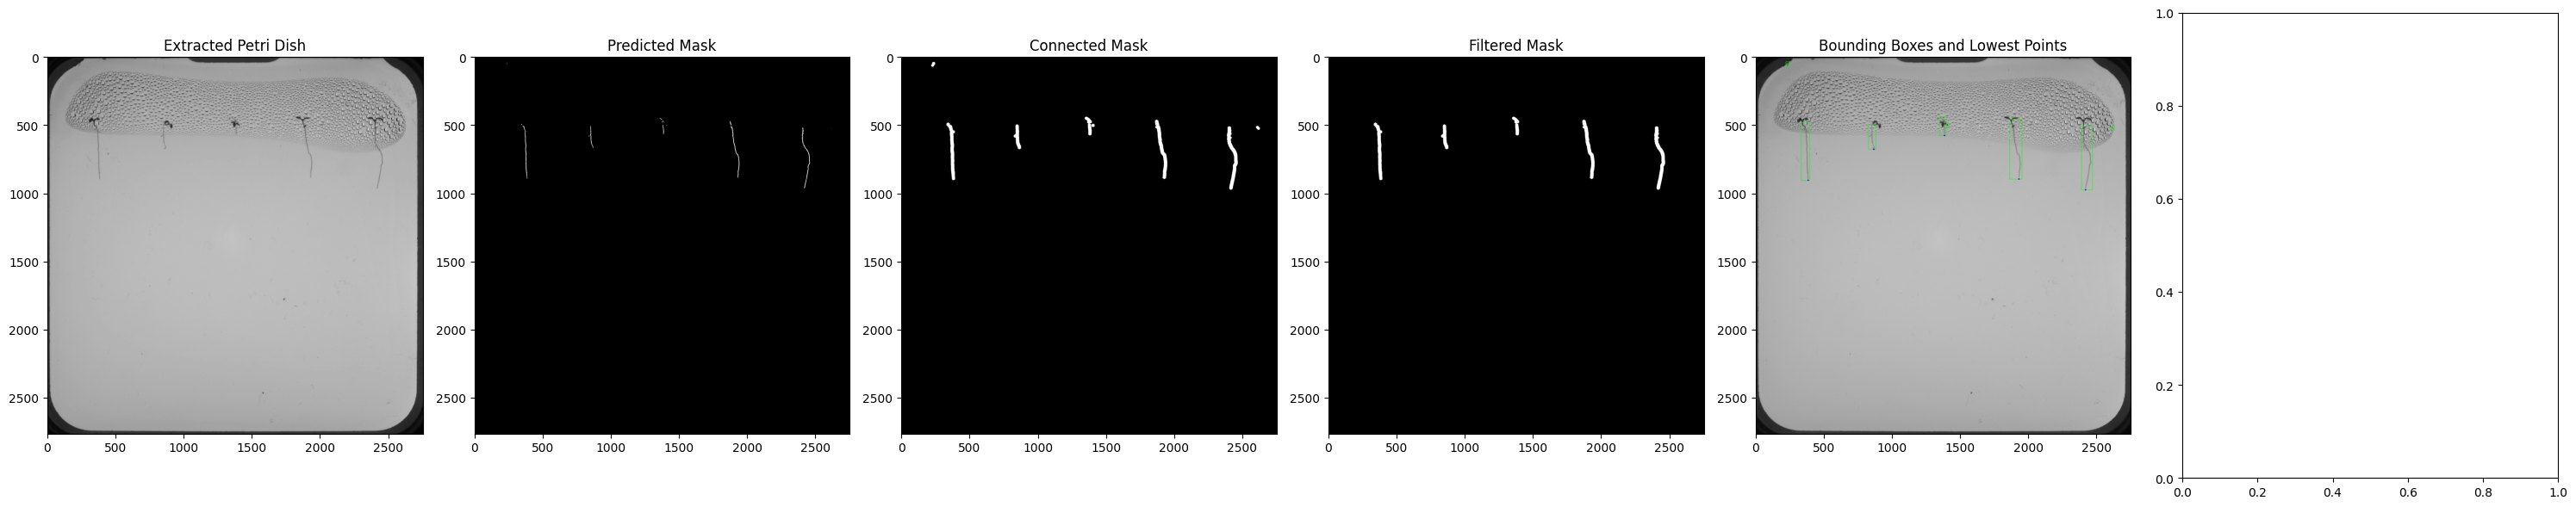

2025-01-12 16:30:35,978 - INFO - Processing image: test_image_8.png


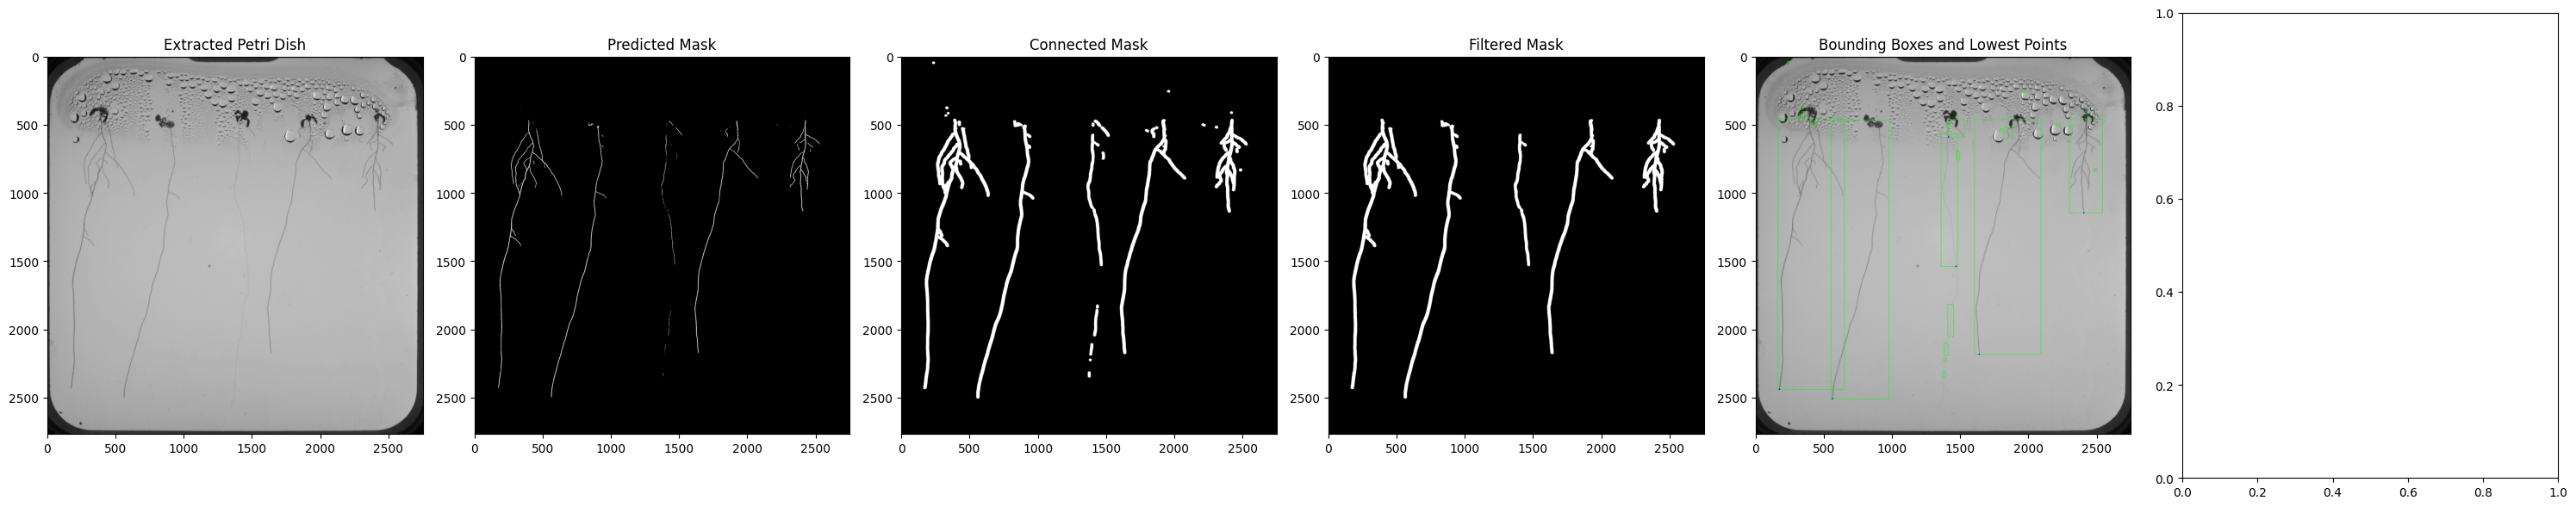

2025-01-12 16:30:40,485 - INFO - Processing image: test_image_9.png


ResourceExhaustedError: Graph execution error:

Detected at node 'model_1/concatenate_7/concat' defined at (most recent call last):
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
      app.start()
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\ipykernel\kernelapp.py", line 739, in start
      self.io_loop.start()
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\tornado\platform\asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\asyncio\base_events.py", line 1909, in _run_once
      handle._run()
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue
      await self.process_one()
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in process_one
      await dispatch(*args)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell
      await result
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\ipykernel\ipkernel.py", line 362, in execute_request
      await super().execute_request(stream, ident, parent)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\ipykernel\kernelbase.py", line 778, in execute_request
      reply_content = await reply_content
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\ipykernel\ipkernel.py", line 449, in do_execute
      res = shell.run_cell(
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell
      result = self._run_cell(
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell
      result = runner(coro)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\szala\AppData\Local\Temp\ipykernel_2572\1202635493.py", line 144, in <module>
      full_pipeline(INPUT_DIR, model, OUTPUT_CSV)
    File "C:\Users\szala\AppData\Local\Temp\ipykernel_2572\1202635493.py", line 124, in full_pipeline
      predicted_mask = predict_root_mask(petri_dish, model)
    File "C:\Users\szala\AppData\Local\Temp\ipykernel_2572\1202635493.py", line 51, in predict_root_mask
      predictions = model.predict(patches, verbose=0)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\layers\merging\base_merge.py", line 196, in call
      return self._merge_function(inputs)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\layers\merging\concatenate.py", line 134, in _merge_function
      return backend.concatenate(inputs, axis=self.axis)
    File "c:\Users\szala\anaconda3\envs\tf2.10-gpu\lib\site-packages\keras\backend.py", line 3572, in concatenate
      return tf.concat([to_dense(x) for x in tensors], axis)
Node: 'model_1/concatenate_7/concat'
OOM when allocating tensor with shape[32,128,128,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_1/concatenate_7/concat}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_1874]

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import logging
from tensorflow.keras.models import load_model
from skimage.morphology import skeletonize

# Configure logging
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
    handlers=[logging.FileHandler("pipeline_log.txt"), logging.StreamHandler()]
)

# Preprocessing: Load and preprocess the input image
def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")
    return image

# Petri dish extraction
def extract_petri_dish(image):
    _, thresholded = cv2.threshold(image, 57, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        logging.warning("No contours detected for Petri dish.")
        return image, np.ones_like(image)
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)
    mask = np.zeros_like(image)
    cv2.drawContours(mask, [largest_contour], -1, 255, -1)
    cropped_image = image[y:y+h, x:x+w]
    return cropped_image, mask[y:y+h, x:x+w]

# Predict the root mask
def predict_root_mask(image, model, patch_size=128, stride=64):
    h, w = image.shape
    patches = []
    positions = []
    for y in range(0, h - patch_size + 1, stride):
        for x in range(0, w - patch_size + 1, stride):
            patch = image[y:y+patch_size, x:x+patch_size]
            patch_rgb = np.stack([patch]*3, axis=-1)
            patches.append(patch_rgb)
            positions.append((y, x))

    patches = np.array(patches) / 255.0
    predictions = model.predict(patches, verbose=0)

    reconstructed = np.zeros((h, w), dtype=np.float32)
    counts = np.zeros((h, w), dtype=np.float32)
    for pred, (y, x) in zip(predictions, positions):
        pred = pred[..., 0]
        reconstructed[y:y+patch_size, x:x+patch_size] += pred
        counts[y:y+patch_size, x:x+patch_size] += 1
    return (reconstructed / np.maximum(counts, 1) > 0.5).astype(np.uint8)

# Connect fragmented roots
def connect_roots(mask):
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    return cv2.dilate(mask, kernel, iterations=5)

# Filter and measure bounding boxes
def filter_and_select_largest_objects(mask, min_area=300, max_objects=5):
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)
    valid_objects = [(i, stats[i, cv2.CC_STAT_AREA]) for i in range(1, num_labels) if stats[i, cv2.CC_STAT_AREA] >= min_area]
    largest_objects = sorted(valid_objects, key=lambda x: x[1], reverse=True)[:max_objects]

    filtered_mask = np.zeros_like(mask, dtype=np.uint8)
    for obj_id, _ in largest_objects:
        filtered_mask[labels == obj_id] = 255
    return filtered_mask, largest_objects, labels

# Extract the lowest point
def get_lowest_points(filtered_mask, bounding_boxes):
    lowest_points = []
    for box in bounding_boxes:
        x, y, w, h = box
        roi = filtered_mask[y:y+h, x:x+w]
        coords = np.column_stack(np.where(roi > 0))
        if len(coords) > 0:
            lowest_local = coords[np.argmax(coords[:, 0])]
            lowest_global = (lowest_local[0] + y, lowest_local[1] + x)
            lowest_points.append(lowest_global)
        else:
            lowest_points.append(None)
    return lowest_points

# Visualization of pipeline steps
def visualize_pipeline(petri_dish, predicted_mask, connected_mask, filtered_mask, bounding_boxes, lowest_points):
    fig, axes = plt.subplots(1, 6, figsize=(30, 6))
    axes[0].imshow(petri_dish, cmap="gray")
    axes[0].set_title("Extracted Petri Dish")
    axes[1].imshow(predicted_mask, cmap="gray")
    axes[1].set_title("Predicted Mask")
    axes[2].imshow(connected_mask, cmap="gray")
    axes[2].set_title("Connected Mask")
    axes[3].imshow(filtered_mask, cmap="gray")
    axes[3].set_title("Filtered Mask")
    boxed_image = cv2.cvtColor(petri_dish, cv2.COLOR_GRAY2BGR)
    for box, point in zip(bounding_boxes, lowest_points):
        x, y, w, h = box
        cv2.rectangle(boxed_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        if point:
            cv2.circle(boxed_image, (point[1], point[0]), 5, (0, 0, 255), -1)
    axes[4].imshow(boxed_image)
    axes[4].set_title("Bounding Boxes and Lowest Points")
    plt.tight_layout()
    plt.show()

# Main pipeline
def full_pipeline(input_dir, model, output_csv):
    results = []
    for image_name in sorted(os.listdir(input_dir)):
        if not image_name.endswith(".png"):
            continue
        logging.info(f"Processing image: {image_name}")
        image_path = os.path.join(input_dir, image_name)
        image = preprocess_image(image_path)
        petri_dish, _ = extract_petri_dish(image)
        predicted_mask = predict_root_mask(petri_dish, model)
        connected_mask = connect_roots(predicted_mask)
        filtered_mask, _, labels = filter_and_select_largest_objects(connected_mask)
        bounding_boxes = [cv2.boundingRect((labels == i).astype(np.uint8)) for i in range(1, labels.max() + 1)]
        lowest_points = get_lowest_points(filtered_mask, bounding_boxes)

        # Save results
        for idx, point in enumerate(lowest_points, start=1):
            results.append({"Image": image_name, "Plant ID": idx, "Lowest Point": point})
        visualize_pipeline(petri_dish, predicted_mask, connected_mask, filtered_mask, bounding_boxes, lowest_points)

    # Save to CSV
    pd.DataFrame(results).to_csv(output_csv, index=False)
    logging.info(f"Results saved to {output_csv}")

MODEL_PATH = r"C:\Users\szala\Documents\GitHub\2024-25b-fai2-adsai-BarnabasSzalay232430\datalab_tasks\task5\232430_unet_model_128px_v8md.keras"
INPUT_DIR = r"C:\Users\szala\Documents\Y2B\Datasets\kaggle_test"
OUTPUT_CSV = "final_root_measurements_with_lowest_points.csv"

model = load_model(MODEL_PATH, custom_objects={"combined_loss": combined_loss, "f1_metric": f1_metric})
full_pipeline(INPUT_DIR, model, OUTPUT_CSV)
